# Adrian Zaręba | 320672
## NN5 - Testowanie różnych funkcji aktywacji

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## | Dane
### Pobieranie danych oraz ich przetwarzanie w celach wizualizacji

### Klasyfikacja

In [40]:
rings3_regular_test = pd.read_csv('rings3-regular-test.csv')[['x', 'y', 'c']]
rings3_regular_test_x, rings3_regular_test_y, rings3_regular_test_c = rings3_regular_test['x'].values.reshape(-1, 1), rings3_regular_test['y'].values.reshape(-1, 1), rings3_regular_test['c'].values.reshape(-1, 1)
rings3_regular_train = pd.read_csv('rings3-regular-training.csv')[['x', 'y', 'c']]
rings3_regular_train_x, rings3_regular_train_y, rings3_regular_train_c = rings3_regular_train['x'].values.reshape(-1, 1), rings3_regular_train['y'].values.reshape(-1, 1), rings3_regular_train['c'].values.reshape(-1, 1)

rings5_regular_test = pd.read_csv('rings5-regular-test.csv')[['x', 'y', 'c']]
rings5_regular_test_x, rings5_regular_test_y, rings5_regular_test_c = rings5_regular_test['x'].values.reshape(-1, 1), rings5_regular_test['y'].values.reshape(-1, 1), rings5_regular_test['c'].values.reshape(-1, 1)
rings5_regular_train = pd.read_csv('rings5-regular-training.csv')[['x', 'y', 'c']]
rings5_regular_train_x, rings5_regular_train_y, rings5_regular_train_c = rings5_regular_train['x'].values.reshape(-1, 1), rings5_regular_train['y'].values.reshape(-1, 1), rings5_regular_train['c'].values.reshape(-1, 1)

print(f'Size of the Rings3 Regular: {len(rings3_regular_train)}')
print(f'Size of the Xor3: {len(rings3_regular_train)}')

Size of the Rings3 Regular: 1500
Size of the Xor3: 1500


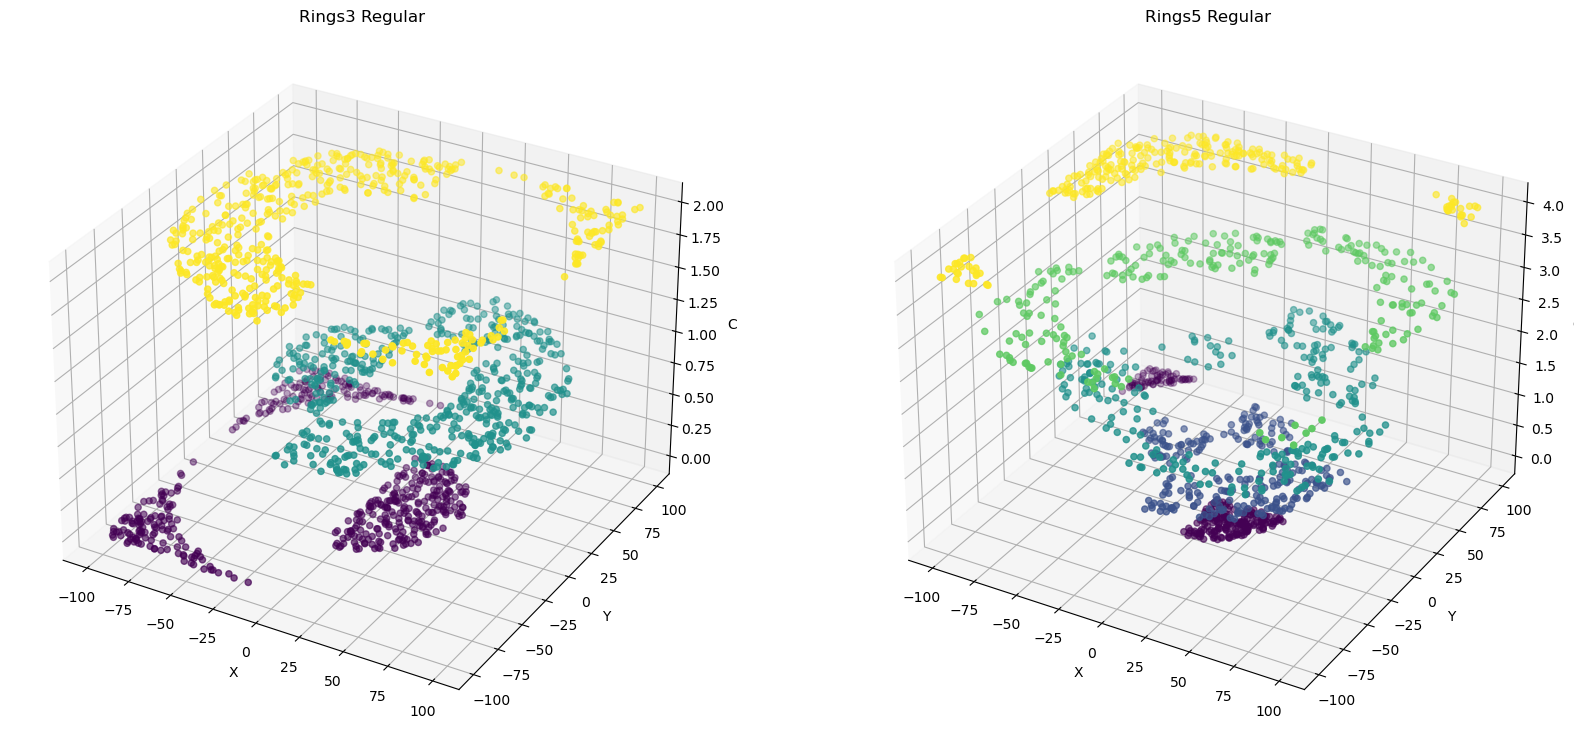

In [41]:
def plot_3d_subplot(ax, x, y, c, title='3D Plot'):
    scatter = ax.scatter(x, y, c, c=c, cmap='viridis', marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('C')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

plot_3d_subplot(axes[0], rings3_regular_train_x, rings3_regular_train_y, rings3_regular_train_c, title='Rings3 Regular')
plot_3d_subplot(axes[1], rings5_regular_train_x, rings5_regular_train_y, rings5_regular_train_c, title='Rings5 Regular')

plt.show()

### Następnie w celach klasyfikacji danych zmienimy podejście w ich przetwarzaniu, stosując One-Hot Encoding 

In [42]:
def one_hot_encode(y):
    return pd.get_dummies(y, dtype=int).to_numpy()

XY_rings3_regular_train = rings3_regular_train[['x', 'y']].to_numpy()
c_rings3_regular_train = one_hot_encode(rings3_regular_train['c'])
XY_rings3_regular_test = rings3_regular_test[['x', 'y']].to_numpy()
c_rings3_regular_test = one_hot_encode(rings3_regular_test['c'])

XY_rings5_regular_train = rings5_regular_train[['x', 'y']].to_numpy()
c_rings5_regular_train = one_hot_encode(rings5_regular_train['c'])
XY_rings5_regular_test = rings5_regular_test[['x', 'y']].to_numpy()
c_rings5_regular_test = one_hot_encode(rings5_regular_test['c'])

### Regresja

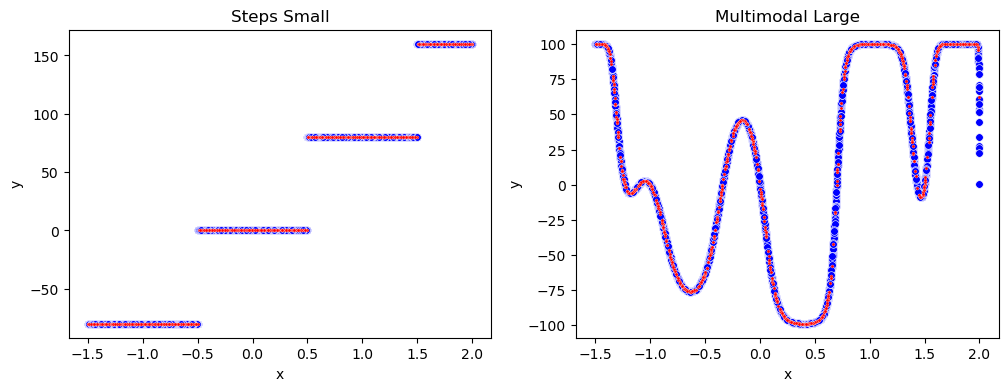

In [43]:
steps_large_test = pd.read_csv('steps-large-test.csv')[['x', 'y']]
steps_large_train = pd.read_csv('steps-large-training.csv')[['x', 'y']]
Steps_Large_Test_X, Steps_Large_Test_y = steps_large_test['x'].values.reshape(-1, 1), steps_large_test['y'].values.reshape(-1, 1)
Steps_Large_Train_X, Steps_Large_Train_y = steps_large_train['x'].values.reshape(-1, 1), steps_large_train['y'].values.reshape(-1, 1)

multimodal_large_test = pd.read_csv('multimodal-large-test.csv')[['x', 'y']]
multimodal_large_train = pd.read_csv('multimodal-large-training.csv')[['x', 'y']]
ML_Test_X, ML_Test_y = multimodal_large_test['x'].values.reshape(-1, 1), multimodal_large_test['y'].values.reshape(-1, 1)
ML_Train_X, ML_Train_y = multimodal_large_train['x'].values.reshape(-1, 1), multimodal_large_train['y'].values.reshape(-1, 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=steps_large_train, x='x', y='y', ax=axes[0], color='blue', s=30)
sns.scatterplot(data=steps_large_test, x='x', y='y', ax=axes[0], color='red', s=5)
axes[0].set_title('Steps Small')

sns.scatterplot(data=multimodal_large_train, x='x', y='y', ax=axes[1], color='blue', s=30)
sns.scatterplot(data=multimodal_large_test, x='x', y='y', ax=axes[1], color='red', s=5)
axes[1].set_title('Multimodal Large')
plt.show()

# | Neural Network

In [53]:
# Funkcje aktywacji i ich pochodne
activation_functions = {
    'sigmoid': lambda z: 1 / (1 + np.exp(-z)),
    'linear': lambda z: z,
    'relu' : lambda z: np.maximum(0, z),
    'softmax' : lambda z: np.exp(z - np.max(z)) / np.exp(z - np.max(z)).sum(axis=1, keepdims=True),
    'tanh': lambda z: np.tanh(z)

}

derivative_activation_functions = {
    "sigmoid": lambda x: x * (1 - x),
    "linear": lambda x: 1,
    "relu": lambda x: (x > 0).astype(float),
    "tanh": lambda x: 1 - np.tanh(x)**2 
}

# Funkcje inicjalizacji wag
initialization_functions = {
    'xavier': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(1. / n_out if n_out is not None else 1. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'he': lambda n_in, n_out=None: np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out) if n_out is not None else n_in),
    'uniform': lambda n_in, n_out=None: np.random.uniform(0, 1, (n_in, n_out) if n_out is not None else n_in),
}

# Klasa reprezentująca sztuczną sieć neuronową
class NN:
    def __init__(self, architecture, activations='sigmoid', initalization='uniform', model_type='regression', activation_output='linear'):
        """
        Inicjalizacja sztucznej sieci neuronowej.
        Parameters:
        architecture (list): Lista liczby neuronów w każdej warstwie.
        activations (str): Rodzaj funkcji aktywacji używanej we wszystkich warstwach poza ostatnią.
        initialization (str): Metoda inicjalizacji wag.
        """
        self.architecture = architecture
        self.num_layers = len(architecture)
        self.training_process = [[], []]  # Przechowywanie procesu uczenia
        self.weights_history = []  # Historia wag
        self.model_type = model_type # Typ modelu
        if self.architecture[-1] == 1 and model_type != 'regression':
            raise Exception('Determining regression is possible only with one-dimensional output. Change the architecture.')

        # Wybór funkcji inicjalizacji wag
        self.init_function = initialization_functions[initalization]
        # Inicjalizacja wag i biasów
        self.weights = [self.init_function(architecture[i-1], architecture[i]) for i in range(1, self.num_layers)]
        self.biases = [self.init_function(architecture[i]) for i in range(1, self.num_layers)]

        # Kojarzy mi się z velocity dla momentum. Inicjalizacja też tutaj dla RMSProp
        self.s_weights = [np.zeros_like(w) for w in self.weights]
        self.s_biases = [np.zeros_like(b) for b in self.biases]

        # Dobór funkcji na outpucie w zależności od modelu
        #if model_type == 'regression':
        #    activation_output = 'linear'
        #elif model_type == 'classification':
        #    activation_output = 'softmax'

        # Wybór funkcji aktywacji
        self.activations = [activations for i in range(1, self.num_layers - 1)] + [activation_output]
        self.activation_funcs = list(map(lambda x: activation_functions.get(x), [activations for i in range(1, self.num_layers - 1)] + [activation_output]))


    def record_weights(self):
        """Zapisuje bieżące wagi sieci."""
        self.weights_history.append([w.copy() for w in self.weights])


    def forward(self, a, return_activations=False):
        """
        Przekazuje dane przez sieć w kierunku od wejścia do wyjścia.
        Parameters:
        a (numpy.ndarray): Wejście sieci.
        return_activations (bool): Określa, czy zwracać aktywacje na każdej warstwie.
        Returns:
        numpy.ndarray: Wyjście sieci.
        """        
        activations = [a] if return_activations else None
        
        for w, b, func in zip(self.weights, self.biases, self.activation_funcs):
            a = func(np.dot(a, w)+b)
            if return_activations:
                activations.append(a)
        return activations if return_activations else a
    
    
    def MSE(self, X, y, denormalize=None):
        """
        Oblicza błąd średniokwadratowy dla danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        Returns:
        float: Błąd średniokwadratowy.
        """
        predictions = self.forward(X)
        if denormalize:
            predictions = destandardize_data(predictions, denormalize)
        return np.mean((predictions - y) ** 2)
    
    
    def fmeasure(self, X, y):
        """
        Oblicza miarę F dla modelu na podstawie danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        Returns:
        float: Miera F dla modelu na podstawie danych wejściowych i oczekiwanych wyjść.
        """
        predictions = self.forward(X)
        predictions = predictions.flatten()
        y = y.flatten()
        
        unique_classes = np.unique(y)
        predictions_new = np.array([unique_classes[np.argmin(np.abs(unique_classes - prediction))] for prediction in predictions])
        predictions_new = predictions_new.astype(y.dtype)

        true_positives = np.sum(np.equal(predictions_new, y))
        precision = true_positives / len(predictions_new)
        recall = true_positives / np.sum(np.isin(y, predictions_new))
        if precision + recall == 0:
            return 0
        fmeasure = 2 * (precision * recall) / (precision + recall)
        return fmeasure


    def backward(self, X, y, learning_rate, sigma, beta, epsilon):
        """Propagacja wsteczna"""
        # sigma: szybkość dla momentum
        # beta: współczynnik zapominania dla RMSProp
        # epsilon: anty-zero
        activations = self.forward(X, return_activations=True)
        deltas = [None] * len(self.weights)
        deltas[-1] = activations[-1] - y
        
        for i in reversed(range(len(deltas) - 1)):
            delta_func = derivative_activation_functions[self.activations[i]]
            deltas[i] = np.dot(deltas[i+1], self.weights[i+1].T) * delta_func(activations[i+1])
        
        length = len(self.weights)
        weights_gradient = [None] * length
        biases_gradient = [None] * length
        
        for i in range(length):
            weights_gradient[i] = np.dot(activations[i].T, deltas[i])
            biases_gradient[i] = np.sum(deltas[i], axis=0)

        if sigma is None:
            sigma = 0
                
        m = len(X)
        for i in range(len(self.weights)):
            weights_gradient = np.dot(activations[i].T, deltas[i])
            biases_gradient = np.sum(deltas[i], axis=0)
            # Aktualizacja wag
            if beta is not None:
                # RMSProp
                # Tutaj learning rate nie jest dzielony przez len(X). Wygodniej i sprawniej bez tego
                self.s_weights[i] = beta * self.s_weights[i] + (1 - beta) * np.square(weights_gradient)
                self.s_biases[i] = beta * self.s_biases[i] + (1 - beta) * np.square(biases_gradient)
                self.weights[i] -= (learning_rate / ((np.sqrt(self.s_weights[i] + epsilon)))) * weights_gradient
                self.biases[i] -= (learning_rate / ((np.sqrt(self.s_biases[i] + epsilon)))) * biases_gradient
            else:
                # Momentum
                self.s_weights[i] = sigma * self.s_weights[i] + (1 - sigma) * weights_gradient
                self.s_biases[i] = sigma * self.s_biases[i] + (1 - sigma) * biases_gradient
                self.weights[i] -= (learning_rate / m) * self.s_weights[i]
                self.biases[i] -= (learning_rate / m) * self.s_biases[i]


    def create_batches(self, X, y, batch_size):
        """
        Tworzy batche danych wejściowych i oczekiwanych wyjść.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        y (numpy.ndarray): Oczekiwane wyjścia.
        batch_size (int): Rozmiar batcha.
        Returns:
        tuple: Tuple zawierający batche danych wejściowych i oczekiwanych wyjść.
        """
        size = len(X)
        indices = np.arange(size)
        np.random.shuffle(indices)
        # Tutaj wsadzamy procent, jeżeli nie znamy wielkości zbioru
        if batch_size <= 1:
            batch_size = round(size*batch_size)
        
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        X_mini_batches = [X_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        y_mini_batches = [y_shuffled[i:i+batch_size] for i in range(0, size, batch_size)]
        return X_mini_batches, y_mini_batches
    

    def train(self, X, y, X_test, y_test, denormalize=None,       # Dane
              learning_rate=0.01, epochs=10000, batch_size=None,  # Podstawowe zmienne
              velocity=None, beta=None, epsilon=1e-8,             # Zmienne dla gradientów
              target=None, update_rate=1):                        # Dodatkowe
        """
        Trenuje sieć neuronową.
        Parameters:
        X (numpy.ndarray): Dane treningowe.
        y (numpy.ndarray): Oczekiwane wyjścia dla danych treningowych.
        X_test (numpy.ndarray): Dane testowe.
        y_test (numpy.ndarray): Oczekiwane wyjścia dla danych testowych.
        learning_rate (float): Współczynnik uczenia.
        epochs (int): Liczba epok.
        batch_size (int): Rozmiar batcha.
        denormalize (tuple): Tuple zawierający parametry do denormalizacji danych.
        target (float): Wartość MSE na której chcemy zakończyć uczenie.
        update_rate (int): Częstotliwość aktualizacji wyników. (Przyczynia się do czasu działania)
        velocity (float): Parametr kontrolujący tempo i kierunek aktualizacji wag
        beta (float): Parametr dla RMSProp
        epsilon (float): anty-zero
        """
        warnings.filterwarnings("ignore", category=RuntimeWarning)      

        if self.model_type != "regression" and target is not None:
            if target > 1:
                print('For classification F-measure must be less than 1')
                return

        if velocity is not None and beta is not None:
            print('You need to choose between simple momentum and RMSProp')
            return
        
        if batch_size is None:
            batch_size = len(X)
        
        y_mse_fmeasure = y
        if denormalize is not None:
            y_mse_fmeasure = destandardize_data(y, denormalize)

        # Do wizualizacji procesu. W print ważne przy określaniu dokładności wyświetlanych wyników
        field_width = 8
        try:
            loss_test = 0
            for epoch in range(1, epochs+1):
                if batch_size < len(X):
                    batches_x, batches_y = self.create_batches(X, y, batch_size)
                    for i in range(len(batches_x)):
                        self.backward(batches_x[i], batches_y[i], learning_rate, velocity, beta, epsilon)
                else:
                    self.backward(X, y, learning_rate, velocity, beta, epsilon)
                
                if (epoch % update_rate) == 0 or epoch == epochs:
                    self.record_weights()
                    if not self.model_type != "regression":
                        loss = self.MSE(X, y_mse_fmeasure, denormalize=denormalize)
                        loss_test = self.MSE(X_test, y_test, denormalize=denormalize)
                        self.training_process[0].append(epoch)
                        self.training_process[1].append(loss)
                        print(f"MSE Test: {loss_test:>{field_width}.2f} | MSE Train: {loss:>{field_width}.2f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                    elif self.model_type != "regression":
                        loss = self.fmeasure(X, y_mse_fmeasure)
                        loss_test = self.fmeasure(X_test, y_test)
                        self.training_process[0].append(epoch)
                        self.training_process[1].append(loss)
                        print(f"F-measure Test: {loss_test:>{field_width}.4f} | F-measure Train: {loss:>{field_width}.4f} | Percentage: {((epoch/epochs)*100):>{field_width}.2f}%", end='\r')
                if target is not None and self.model_type != "regression":
                    if loss_test >= target:
                        return
                if target is not None and not self.model_type != "regression":
                    if loss_test <= target:
                        return
        except KeyboardInterrupt:
            print("\nTraining interrupted. Finalizing...")
        except OverflowError:
            result = None 
        except ValueError as e:
            if "operands could not be broadcast together with shapes" in str(e):
                print("Output dimension probably doesn't match the class count. Change the architecture.")
            else:
                raise e
        finally:
            print("Training complete.")
            if not self.model_type != "regression":
                print(f"Final MSE: {loss_test:>{field_width-3}.2f}", end='\r') 
            elif self.model_type != "regression":
                print(f"Final F-measure: {loss_test:>{field_width-3}.2f}", end='\r') 

                

    # Funkcje wizualizacyjne
    def plot_combined(self, X, parameters=None, data=None):
        """
        Wyświetla wykresy predykcji oraz procesu trenowania.
        Parameters:
        X (numpy.ndarray): Dane wejściowe.
        """
        if not self.model_type != "regression":
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            predictions = []
            for x in X:
                predictions.append(self.forward(x)[-1])
            predictions = self.forward(X)
            if X.ndim > 1:
                X = X[:, 0]
            # Na zielono predykcje, na czerwono dane trenujące
            predictions = destandardize_data(np.squeeze(predictions), parameters)
            sns.scatterplot(x=X, y=predictions, color='green', s=20, ax=axes[0])
            sns.scatterplot(data=data, x='x', y='y', ax=axes[0], color='red', s=10)

            axes[0].set_title('Predictions')

            if len(self.training_process[0]) == 0:
                print('You need to train model')
            else:
                sns.scatterplot(x=self.training_process[0], y=self.training_process[1], color='blue', s=20, ax=axes[1])
                axes[1].set_title('Training Process')

            plt.tight_layout()
            plt.show()
        else:
            array = self.forward(X)
            means = [np.sum(row * np.arange(len(row))) for row in array]
            mean_values = np.array(means)

            selected_integers = [np.argmax(arr) for arr in array]

            fig = make_subplots(
                rows=1, cols=2,
                specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]]
            )

            fig.add_trace(go.Scatter3d(
                x=X[:, 0],
                y=X[:, 1],
                z=mean_values,
                mode='markers',
                marker=dict(
                    size=5,
                    color=mean_values,
                    colorscale='Viridis',
                    opacity=0.8
                )
            ), row=1, col=1)

            fig.add_trace(go.Scatter3d(
                x=X[:, 0],
                y=X[:, 1],
                z=selected_integers,
                mode='markers',
                marker=dict(
                    size=5,
                    color=selected_integers,
                    colorscale='Viridis',
                    opacity=0.8
                )
            ), row=1, col=2)
            fig.update_layout(
                title_text='3D plots of Percentage and Classified values',
                width=1100,
                height=550,
            )
            fig.show()

    # New plot function
    def plot_training_process(self, window_size=5, log=False):
        if len(self.training_process[0]) == 0:
            print('You need to train the model')
        else:
            data = pd.DataFrame({
                'Epoch': self.training_process[0],
                'Accuracy': self.training_process[1]
            })
            data['Moving Average'] = data['Accuracy'].rolling(window=window_size).mean()

            plt.figure(figsize=(12, 8))
            sns.lineplot(x='Epoch', y='Moving Average', data=data, color='blue')
            plt.scatter(data['Epoch'], data['Accuracy'], color='red', s=20, alpha=0.5)

            if log:
                plt.yscale('log')

            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title('Training Process')
            plt.grid(True)

            plt.show()          


    def plot_weights(self):
        """Wizualizuje ewolucję wag w czasie."""
        if not self.weights_history:
            print("No weights history to plot. Train the model to generate history.")
            return
        
        fig, axs = plt.subplots(len(self.weights), 1, figsize=(10, len(self.weights) * 3))
        if len(self.weights) == 1:
            axs = [axs]
        
        for i, ax in enumerate(axs):
            weights_layer_i = np.array([weights[i].flatten() for weights in self.weights_history])
            sns.heatmap(weights_layer_i.T, ax=ax, cmap='viridis', cbar=True)
            ax.set_title(f'Layer {i+1} Weights Over Epochs')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Weight Index')
        
        plt.tight_layout()
        plt.show()


def standardize_data(X):
    """Standaryzuje dane."""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean) / std
    return X_new, (mean, std)

def destandardize_data(X, parameters):
    """Denormalizuje dane."""
    return X * parameters[1] + parameters[0]


# | Implementacja
## Testy | Analizy przebiegu uczenia | Finalne modele
### Przeprowadzimy 12 testów dla różnych architektur i funkcji aktywacji

In [ ]:
"""Funkcje aktywacji: (sigmoid, relu, tanh, linear) oraz Architektury: 1 | 2 | 3 warstwy ukryte"""

## Do porównań metod została zaimplementowana rozbudowa funkcji plot_training_process(). Teraz wyświetla ona również liniową średnią kroczącą rekordów oraz pozwala na zastosowanie skali logarytmicznej

## 1 Warstwa ukryta

Training complete. | MSE Train:   243.77 | Percentage:   100.00%


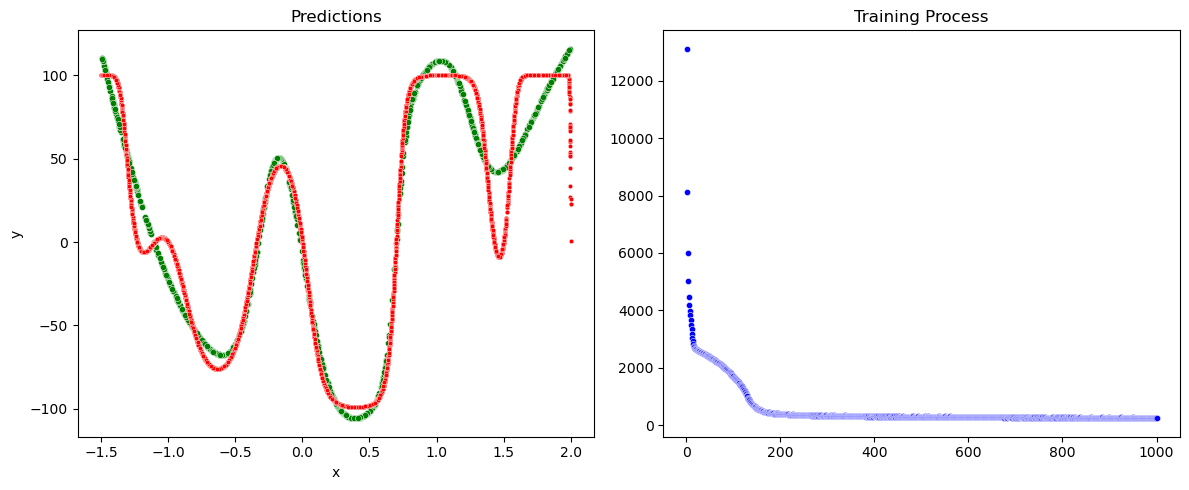

In [62]:
# sigmoid

ml = NN([1, 10, 1], initalization='he', activations='sigmoid')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

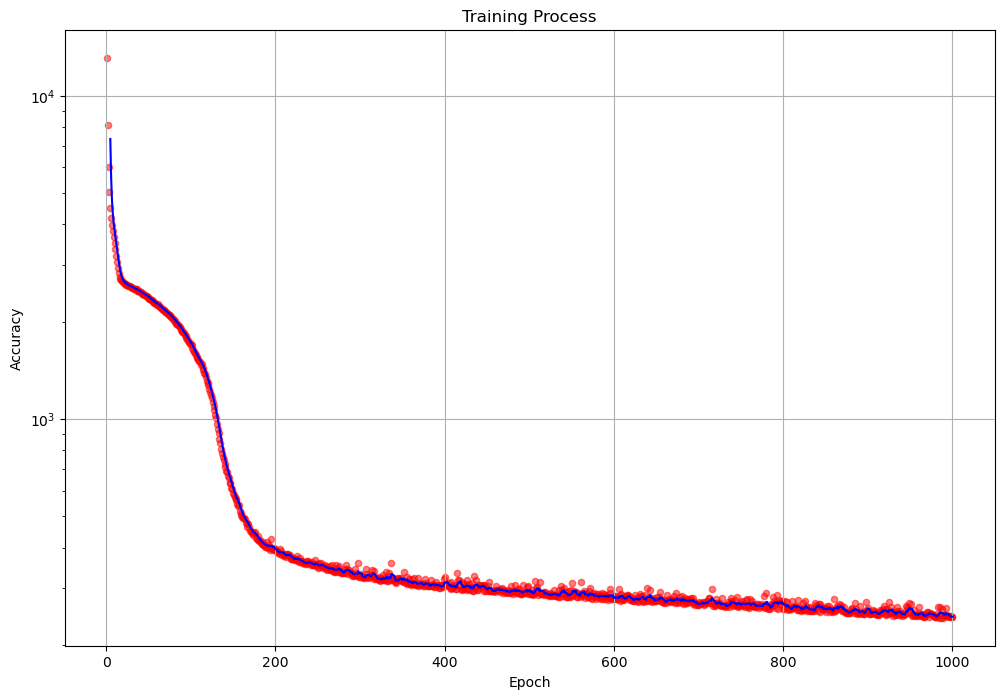

In [63]:
# Nowa funkcja korzystająca ze średniej kroczącej
ml.plot_training_process(log=True)

Training complete. | MSE Train:  4399.84 | Percentage:   100.00%


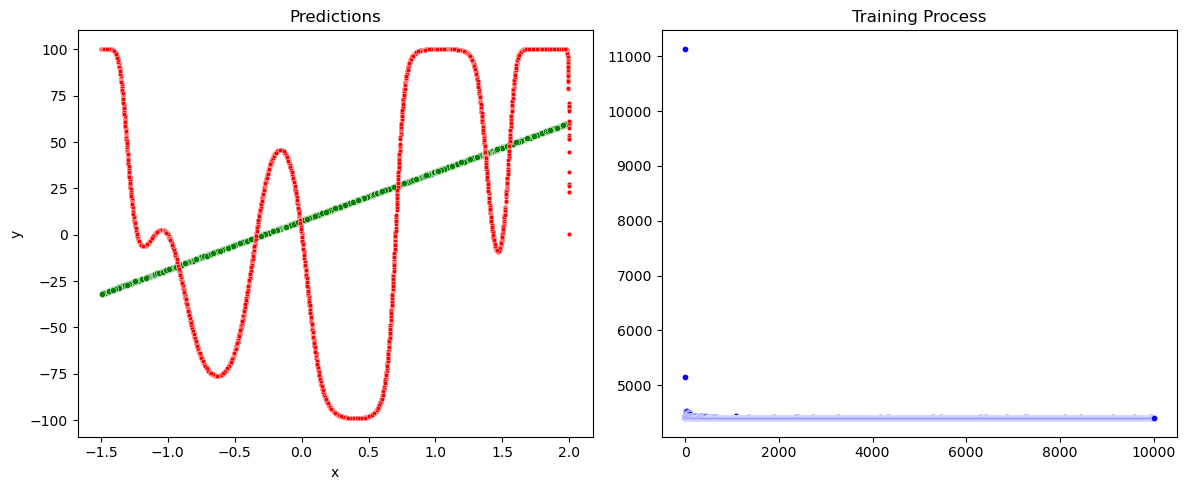

In [13]:
# linear

ml = NN([1, 10, 1], initalization='xavier', activations='linear')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

Training complete. | MSE Train:  1381.54 | Percentage:   100.00%


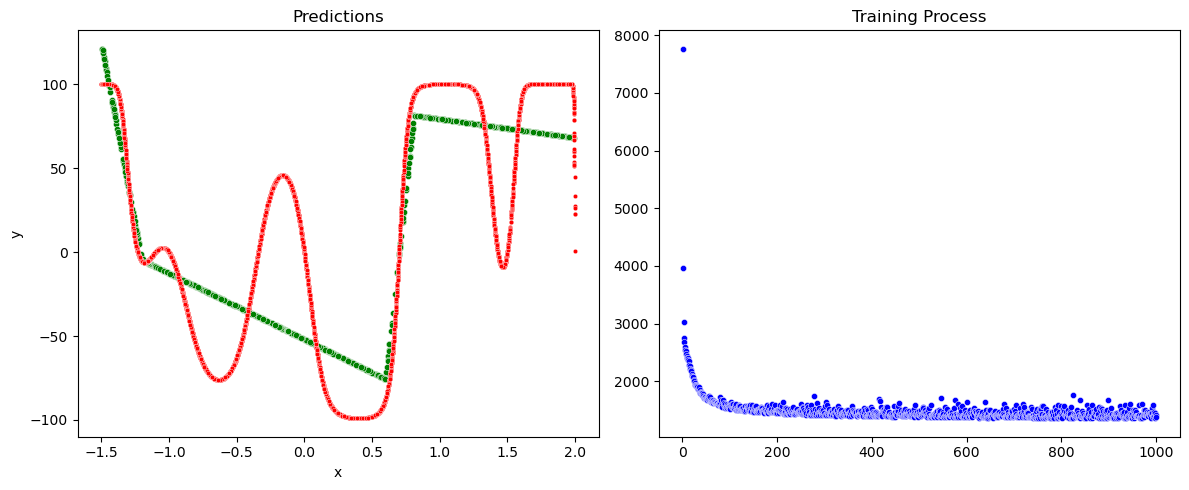

In [64]:
# ReLU

ml = NN([1, 10, 1], initalization='xavier', activations='relu')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

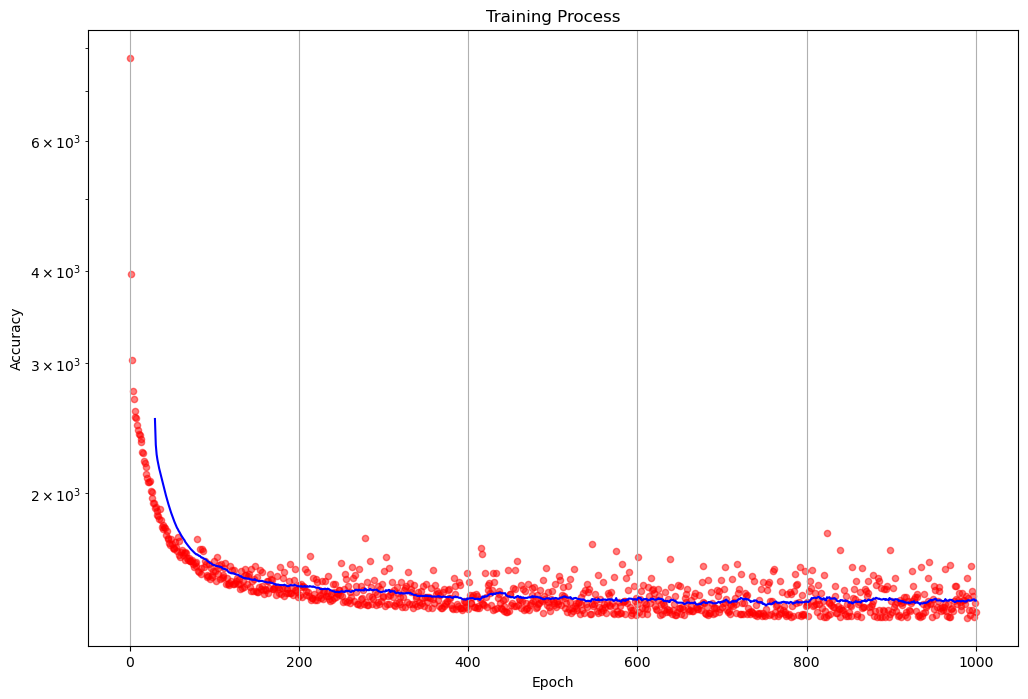

In [66]:
ml.plot_training_process(30, log=True)

Training complete. | MSE Train:   477.72 | Percentage:   100.00%


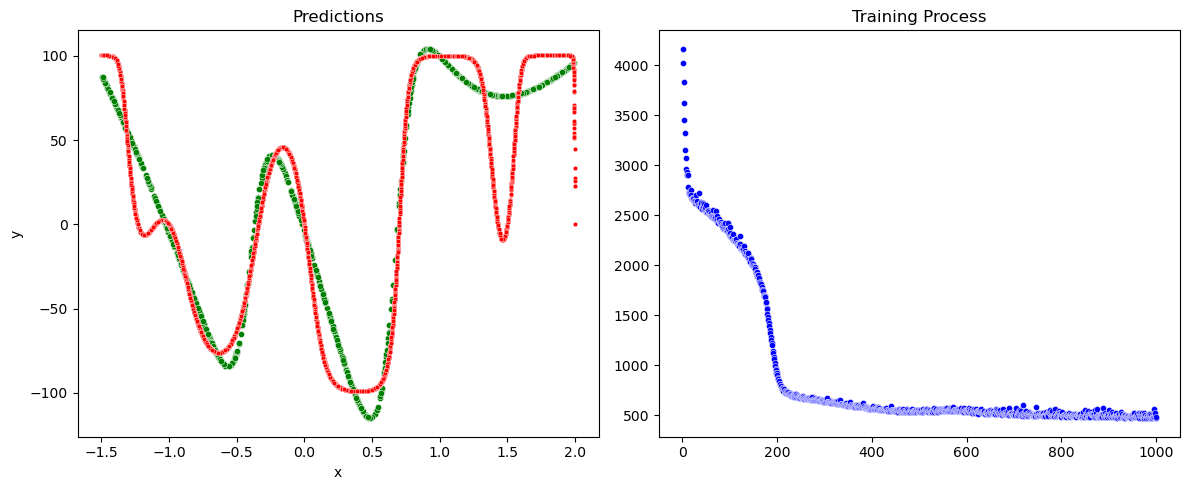

In [67]:
# tanh

ml = NN([1, 10, 1], initalization='xavier', activations='tanh')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

## 2 Warstwy ukryte

Training complete. | MSE Train:    71.56 | Percentage:   100.00%


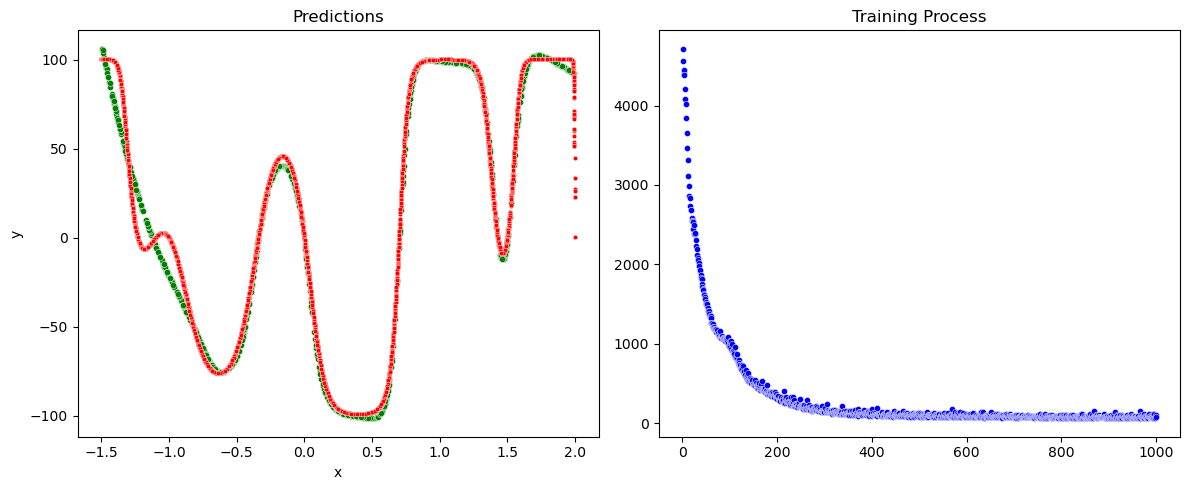

In [16]:
# sigmoid

ml = NN([1, 10, 10, 1], initalization='xavier', activations='sigmoid')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

Training complete. | MSE Train:  4401.12 | Percentage:   100.00%


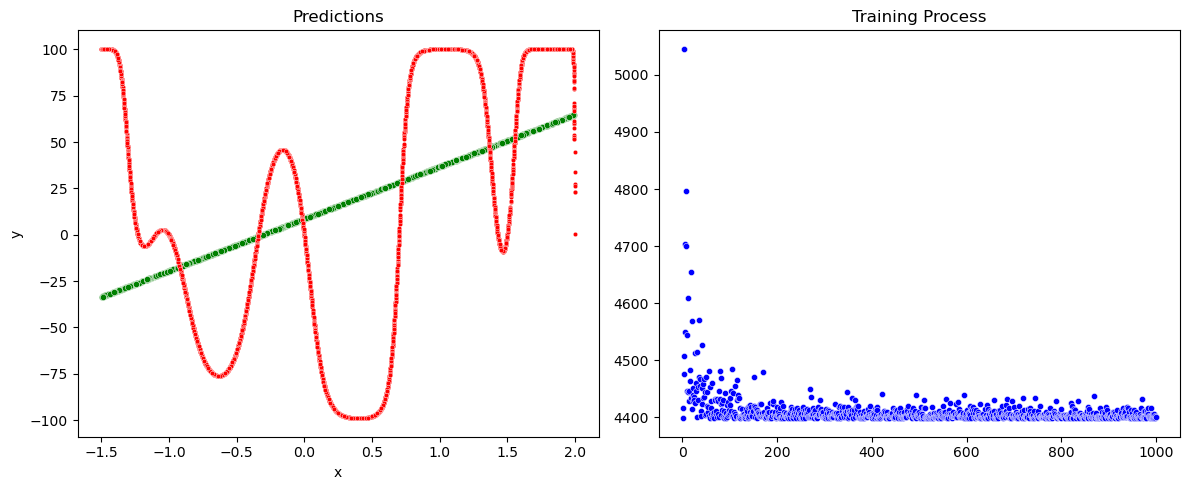

In [16]:
# linear

ml = NN([1, 10, 10, 1], initalization='xavier', activations='linear')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

Training complete. | MSE Train:   177.52 | Percentage:   100.00%


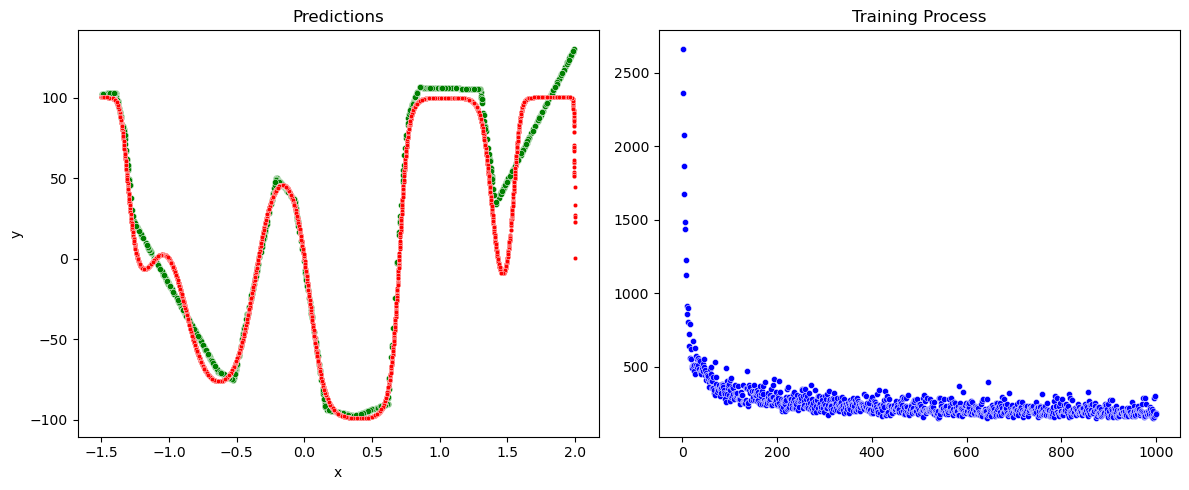

In [68]:
# ReLU

ml = NN([1, 10, 10, 1], initalization='xavier', activations='relu')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

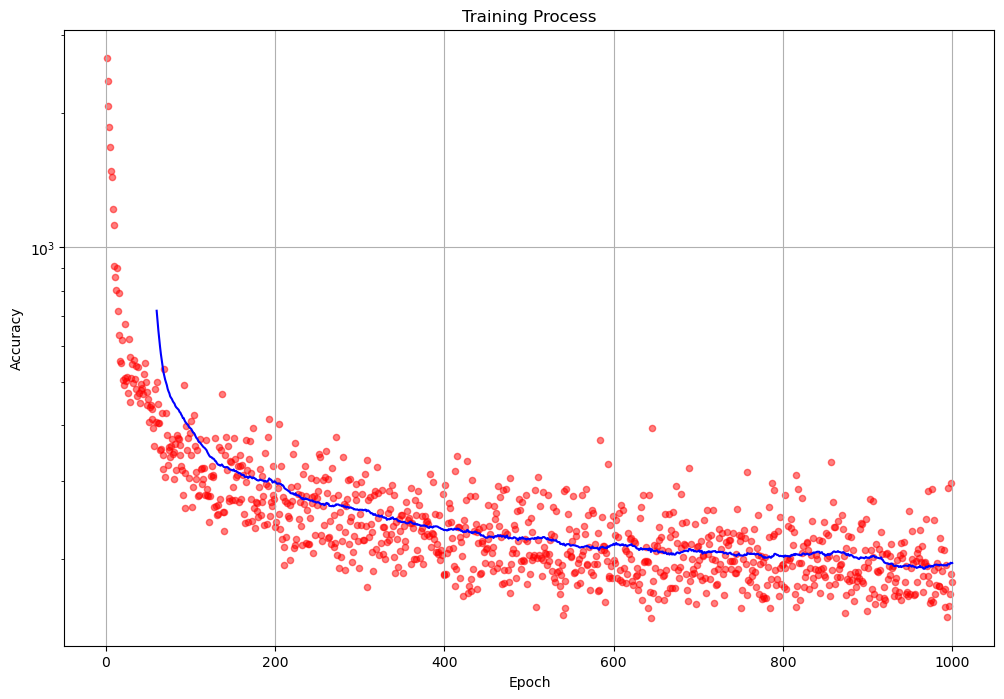

In [73]:
ml.plot_training_process(60, log=True)

Training complete. | MSE Train:   157.74 | Percentage:   100.00%


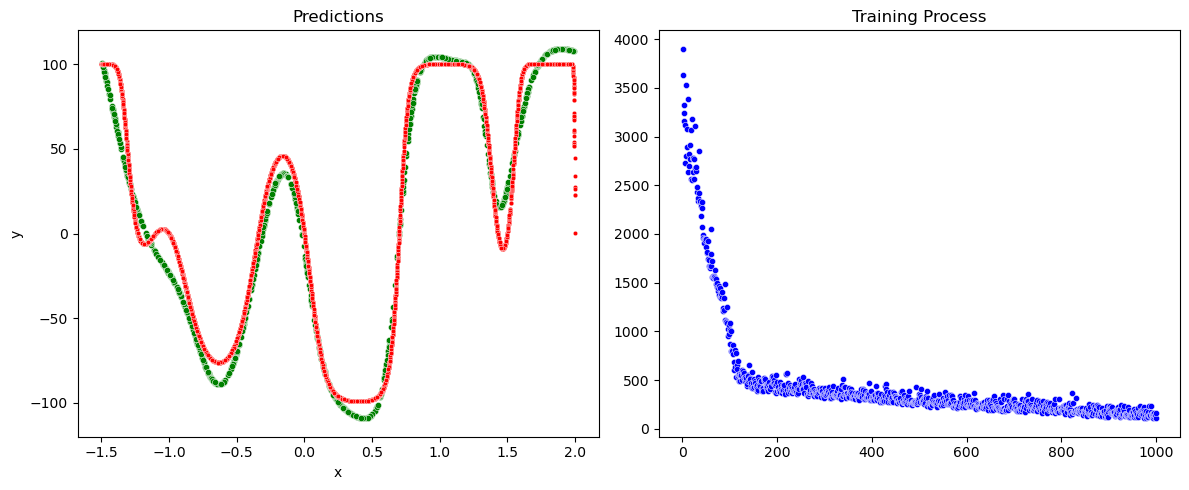

In [74]:
# tanh

ml = NN([1, 10, 10, 1], initalization='xavier', activations='tanh')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

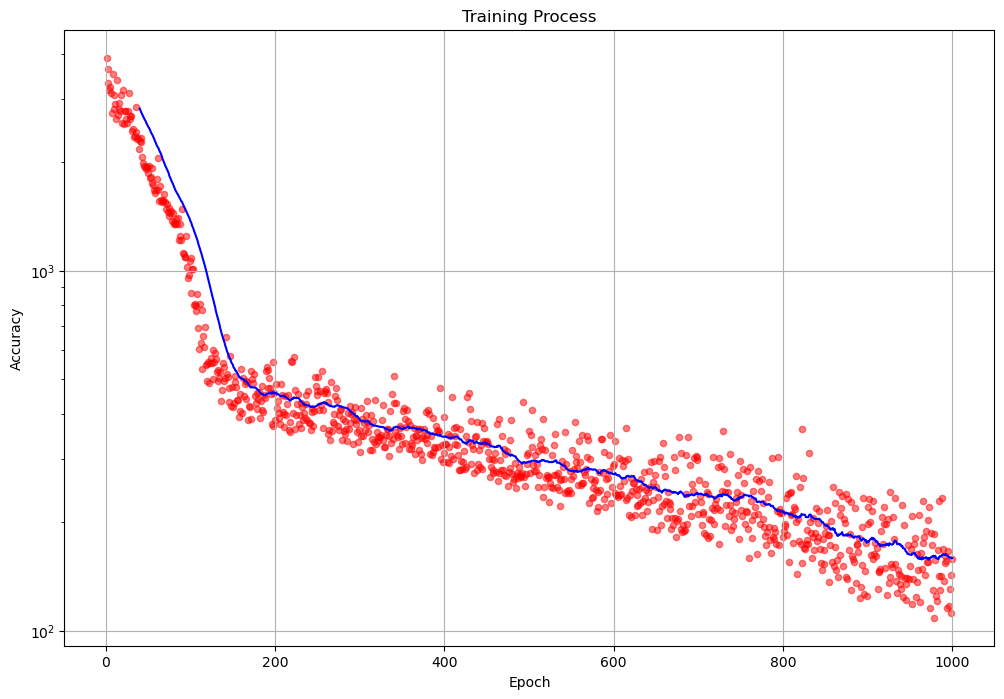

In [76]:
ml.plot_training_process(40, log=True)

## 3 Warstwy ukryte

Training complete. | MSE Train:    21.03 | Percentage:   100.00%


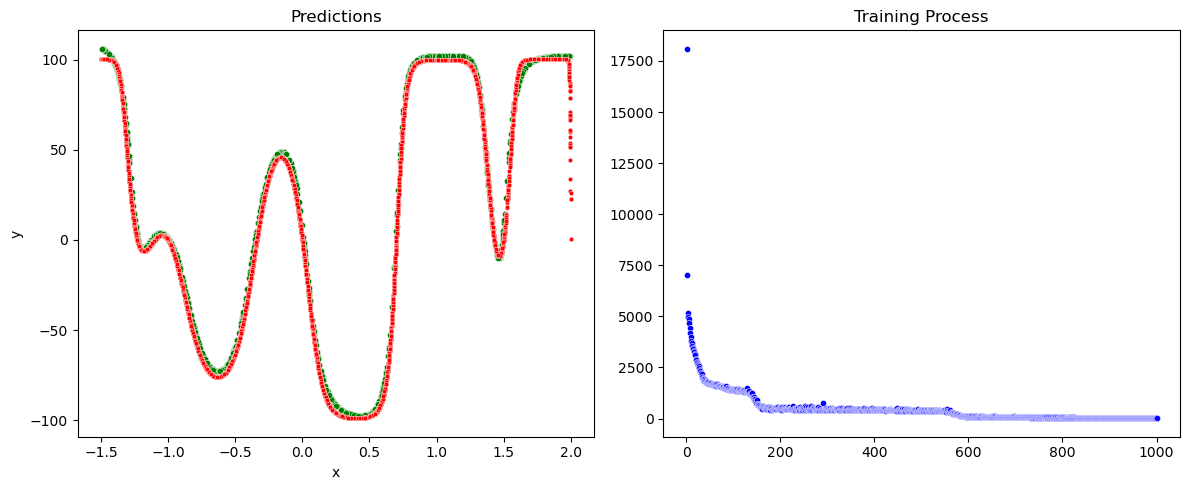

In [20]:
# sigmoid

ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='sigmoid')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

Training complete. | MSE Train:  4403.29 | Percentage:   100.00%


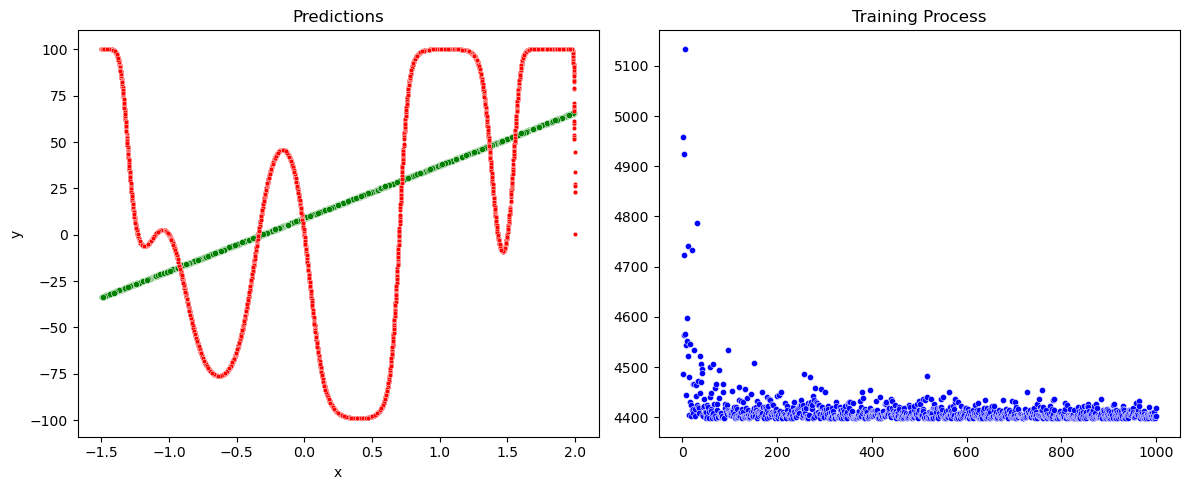

In [21]:
# linear

ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='linear')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

Training complete. | MSE Train:  1521.54 | Percentage:   100.00%


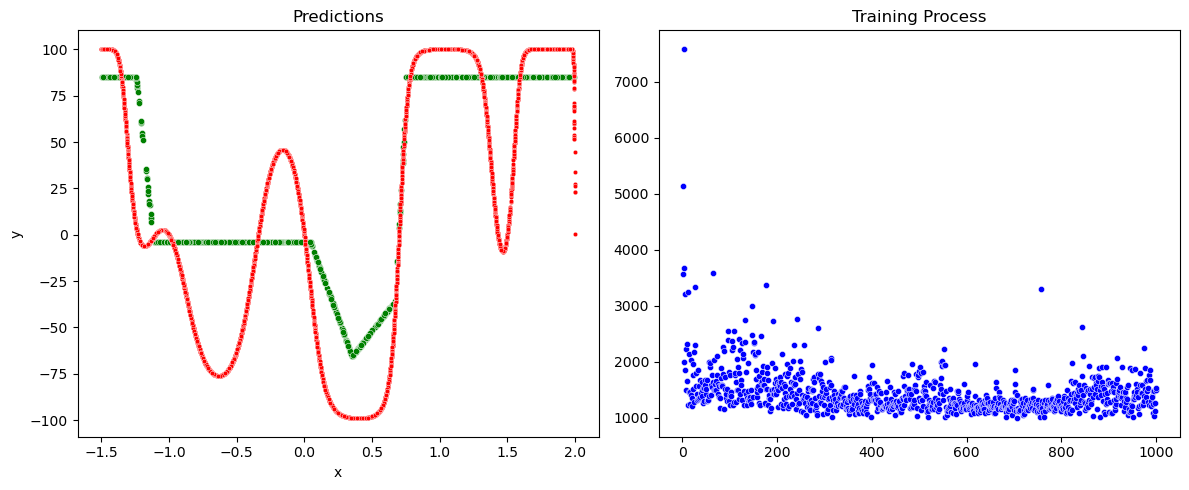

In [78]:
# ReLU

ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='relu')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.1, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

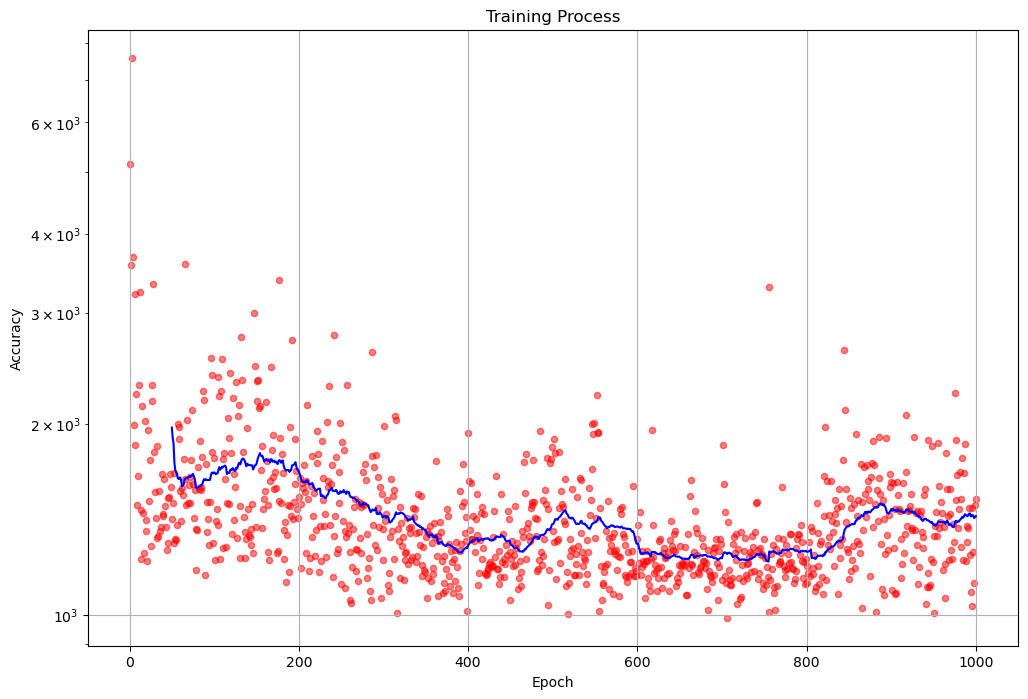

In [81]:
# Tutaj trenowanie w pewnym momencie przestało spadać a nawet zaczęło rosnąć pod względem Accuracy
ml.plot_training_process(50, log=True)

Training complete. | MSE Train:   155.56 | Percentage:   100.00%


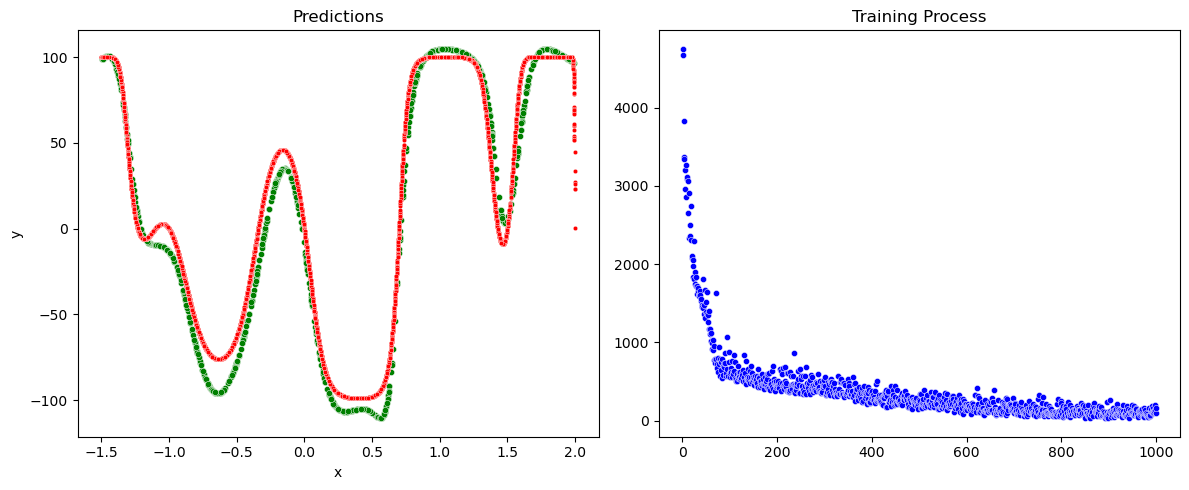

In [82]:
# tanh

ml = NN([1, 10, 10, 10, 1], initalization='xavier', activations='tanh')
y_norm_ml, parameters_ml = standardize_data(ML_Train_y)
ml.train(ML_Train_X, y_norm_ml, ML_Test_X, ML_Test_y, denormalize=parameters_ml,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

ml.plot_combined(ML_Test_X, parameters_ml, multimodal_large_train)

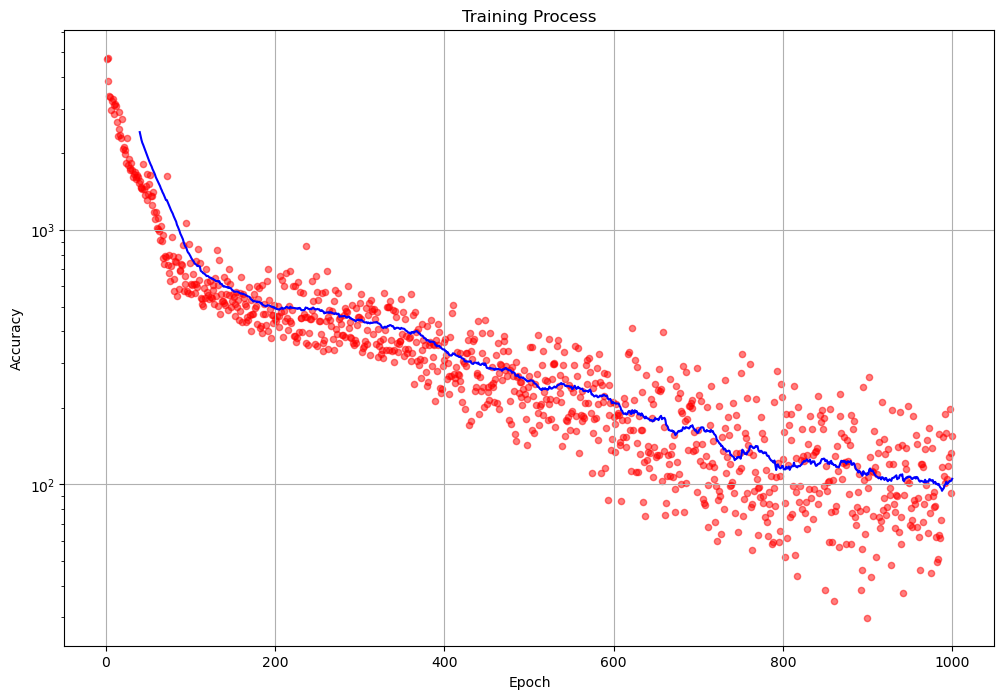

In [85]:
# Mocna rozbieżność podczas uczenia
ml.plot_training_process(40, log=True)

In [89]:
""" Po przeanalizowaniu powyższych procesów uczenia należało wybrać dwie najlepiej radzące sobie metody. 
    Zostały one dobrane za pomocą porównania: 

1. final MSE
2. Szybkości zbiegania
3. Rozrzutu wartości Accuracy względem Epoch
4. Finalnego dopasowania modelu do danych (aspekt wizualny)"""

' Po przeanalizowaniu powyższych procesów uczenia należało wybrać dwie najlepiej radzące sobie metody. \n    Zostały one dobrane za pomocą porównania \n\n1. final MSE\n2. Szybkości zbiegania\n3. Rozrzutu wartości Accuracy względem Epoch\n4. Finalnego dopasowania modelu do danych (aspekt wizualny)'

## Pierwsze wnioski
### Najlepiej spisywały się (przy obecnych parametrach) modele:
##### 1. Sigmoid z dwiema warstwami ukrytymi
##### 2. Sigmoid z trzema warstwami ukrytymi

In [ ]:
"""tanh również osiągał niebanalne rezultaty, jednak proces uczenia (ponownie wspomnę, przy tych parametrach) jest mocno nieregularny"""

## Wybranie dwóch najlepszych zestawów i zastosowanie ich do następnych porównań
# Steps

In [86]:
# Tutaj została zmieniona taktyka, przez lekką alterację parametrów

Training complete. | MSE Train:    61.32 | Percentage:   100.00%


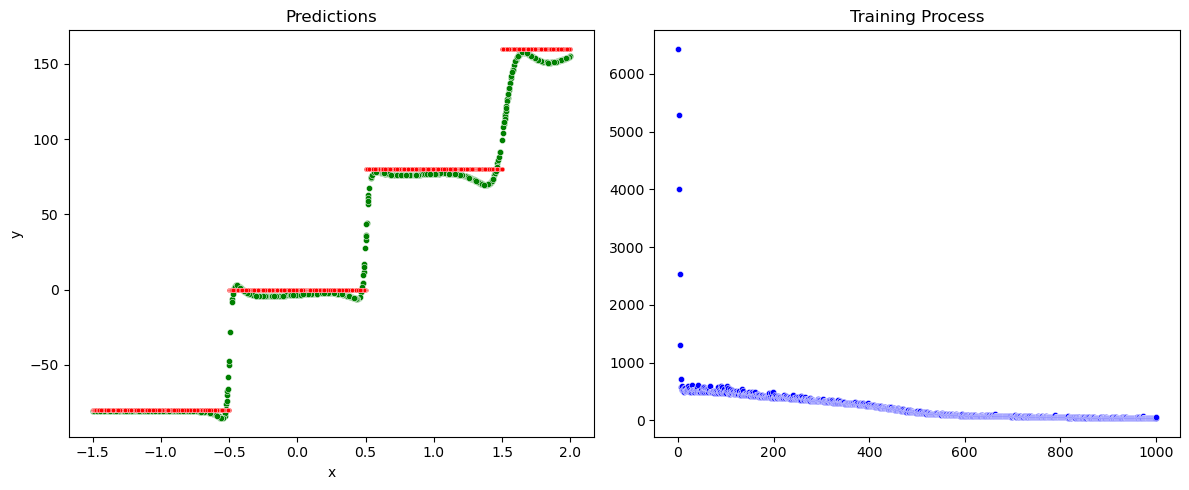

In [88]:
# Dwie warstwy ukryte
sl = NN([1, 10, 10, 1], initalization='xavier', activations='sigmoid')
y_norm_sl, parameters_sl = standardize_data(Steps_Large_Train_y)
sl.train(Steps_Large_Train_X, y_norm_sl, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_sl,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

sl.plot_combined(Steps_Large_Test_X, parameters_sl, steps_large_train)

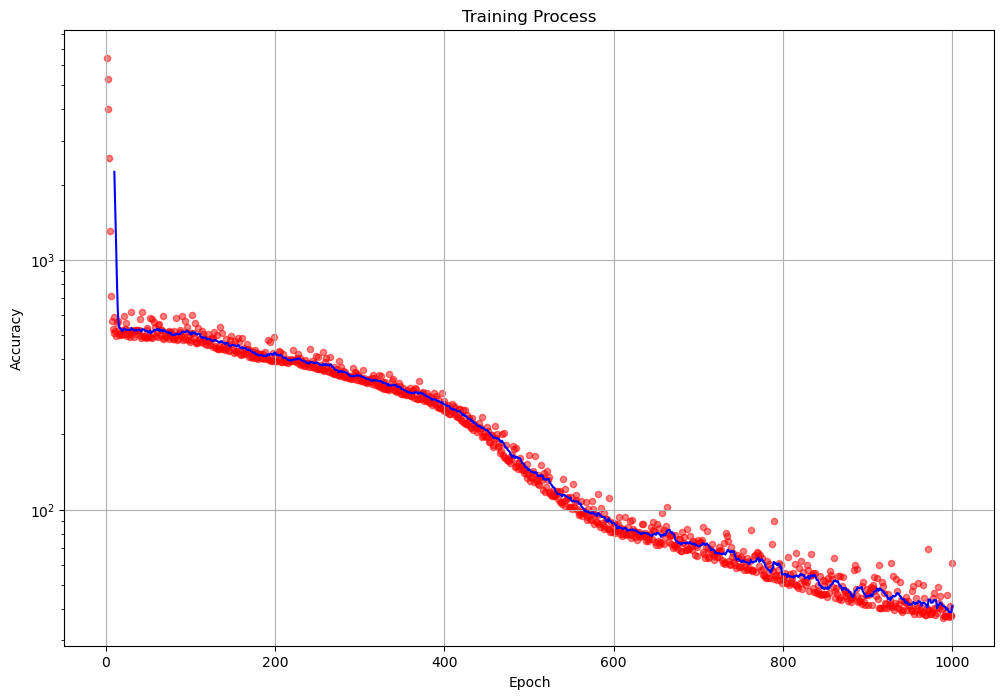

In [90]:
sl.plot_training_process(10, log=True)

Training complete. | MSE Train:    45.25 | Percentage:   100.00%


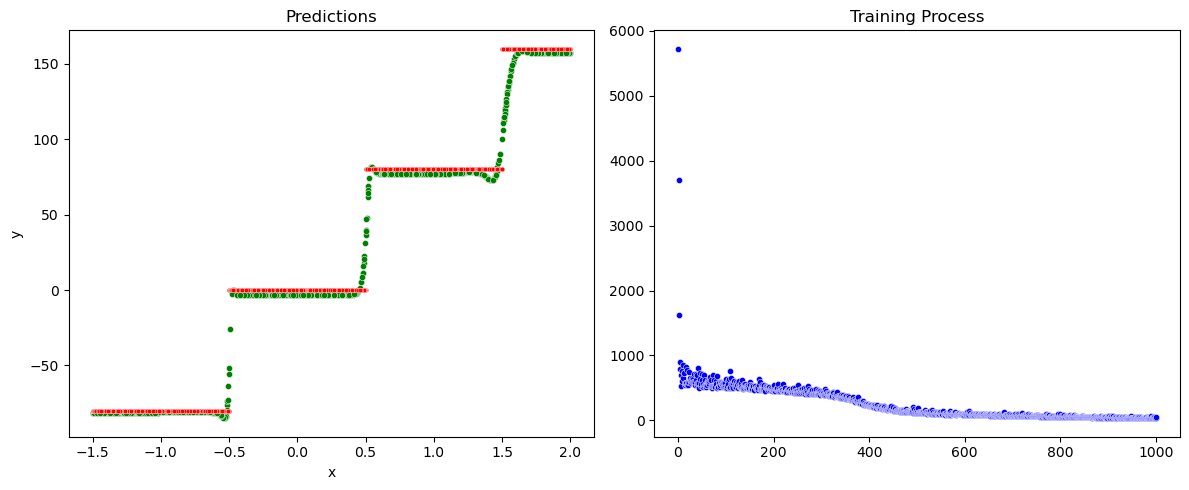

In [92]:
sl = NN([1, 10, 10, 10, 1], initalization='xavier', activations='sigmoid')
y_norm_sl, parameters_sl = standardize_data(Steps_Large_Train_y)
sl.train(Steps_Large_Train_X, y_norm_sl, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_sl,
         learning_rate=0.01, epochs=1000, batch_size=0.1,
         beta=0.9,
         target=9)

sl.plot_combined(Steps_Large_Test_X, parameters_sl, steps_large_train)

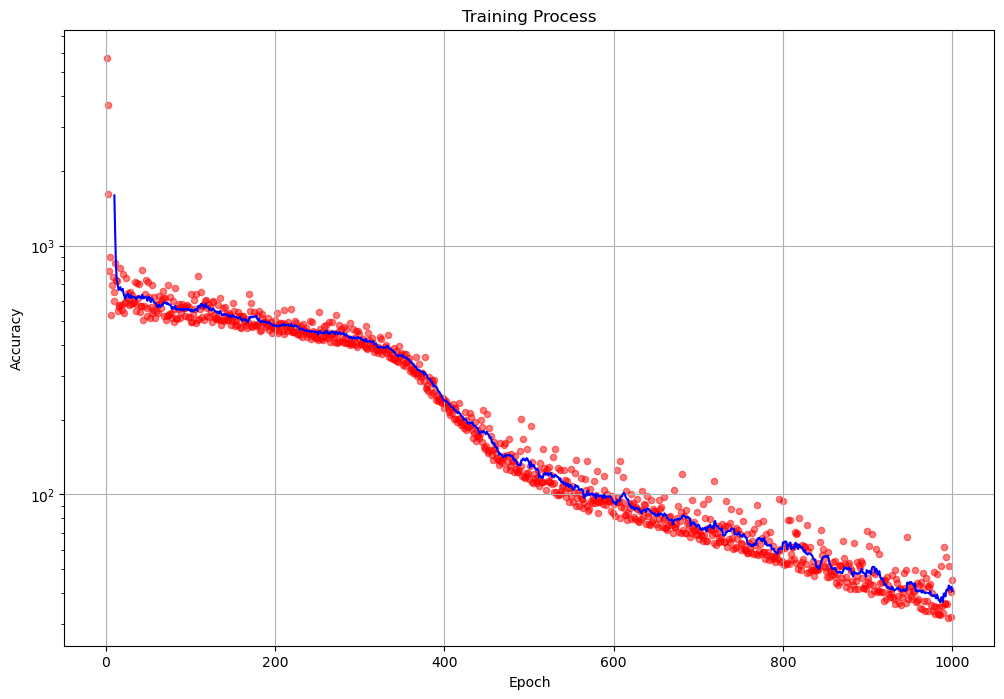

In [93]:
sl.plot_training_process(10, log=True)
# Dla trzech warstw istnieje bardziej zauważalny skok

### Klasyfikacja

# Rings3

In [98]:
r3 = NN([2, 128, 128, 3], initalization='he', model_type='classification', activations='sigmoid', activation_output='softmax')
r3.train(XY_rings3_regular_train, c_rings3_regular_train, XY_rings3_regular_test, c_rings3_regular_test,
         learning_rate=0.01, epochs=50000, batch_size=0.4,
         beta=0.9, target=0.9)

Training complete.0.9060 | F-measure Train:   0.9198 | Percentage:     0.29%


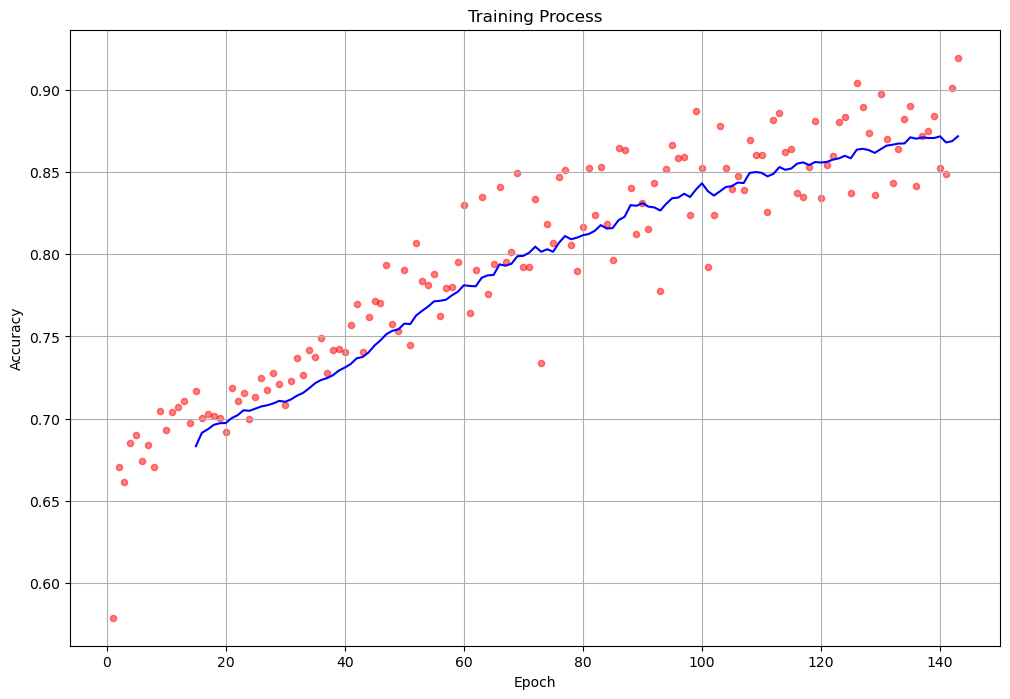

In [99]:
r3.plot_training_process(15)

In [100]:
r3.plot_combined(XY_rings3_regular_train)

In [101]:
r3 = NN([2, 128, 128, 128, 3], initalization='he', model_type='classification', activations='sigmoid', activation_output='softmax')
r3.train(XY_rings3_regular_train, c_rings3_regular_train, XY_rings3_regular_test, c_rings3_regular_test,
         learning_rate=0.01, epochs=50000, batch_size=0.4,
         beta=0.9, target=0.9)

r3.plot_combined(XY_rings3_regular_train)

Training complete.0.9003 | F-measure Train:   0.9200 | Percentage:     0.30%


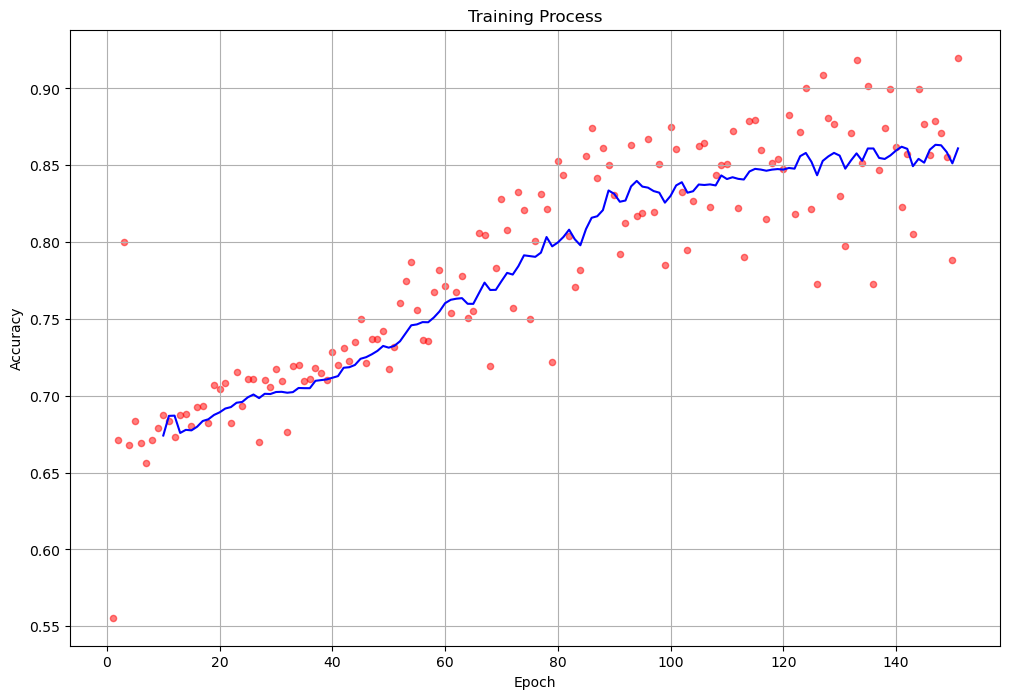

In [102]:
r3.plot_training_process(10)

## Przy trzech warstwach ukrytych model uczył się nieco dłużej, będąc bardziej podatnym na wahania dla Accuracy

# Rings 5

In [104]:
r5 = NN([2, 128, 128, 5], initalization='he', model_type='classification', activations='sigmoid', activation_output='softmax')
r5.train(XY_rings5_regular_train, c_rings5_regular_train, XY_rings5_regular_test, c_rings5_regular_test,
         learning_rate=0.01, epochs=50000, batch_size=0.4,
         beta=0.9, target=0.9)

Training complete.0.9096 | F-measure Train:   0.9366 | Percentage:     0.30%


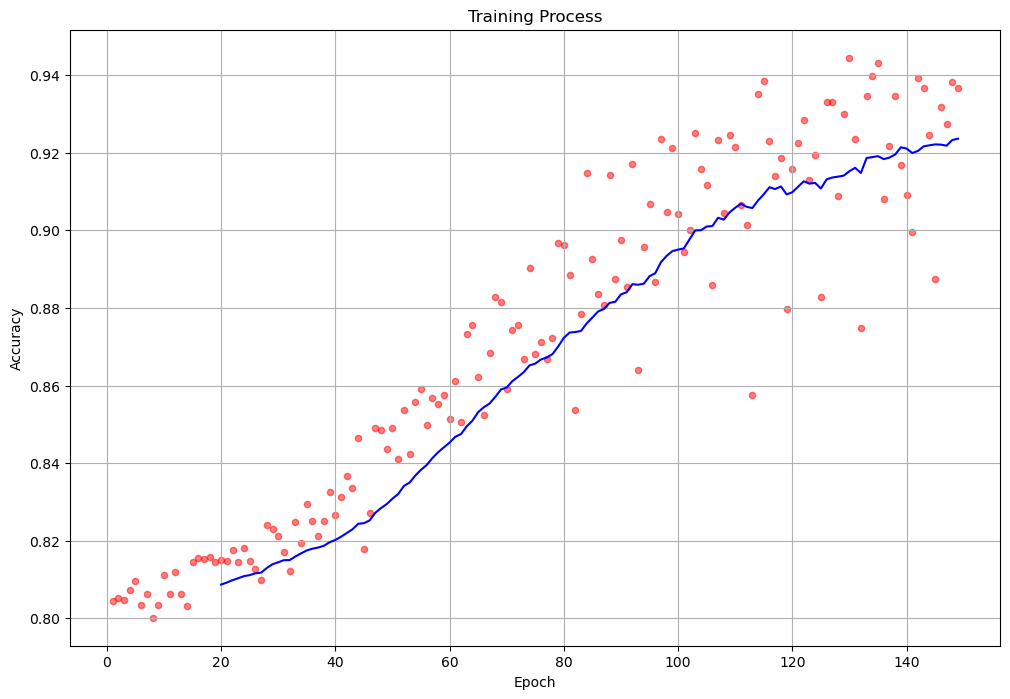

In [106]:
r5.plot_training_process(20)

In [108]:
r5.plot_combined(XY_rings5_regular_train)

In [109]:
r5 = NN([2, 128, 128, 128, 5], initalization='he', model_type='classification', activations='sigmoid', activation_output='softmax')
r5.train(XY_rings5_regular_train, c_rings5_regular_train, XY_rings5_regular_test, c_rings5_regular_test,
         learning_rate=0.01, epochs=50000, batch_size=0.4,
         beta=0.9, target=0.9)

Training complete.0.9021 | F-measure Train:   0.9299 | Percentage:     0.25%


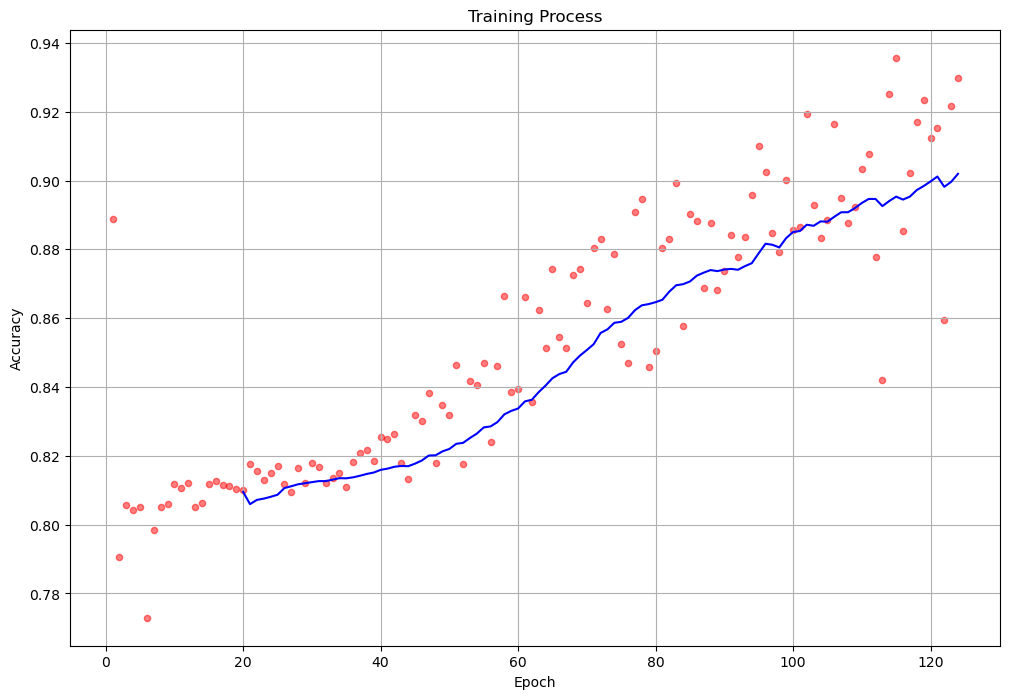

In [111]:
r5.plot_training_process(20)

In [112]:
r5.plot_combined(XY_rings5_regular_train)

# | Najważniejsze obserwacje | Moje spostrzeżenia

#### Na pewno co można powiedzieć, to że nie ma jednoznacznej odpowiedzi na pytanie który model / funkcja aktywacji / parametry są najlepsze. Podczas wykonywanych powyżej testów bazowaliśmy na konkretnych danych, dla których (przy odgórnie wybranych parametrach) funkcje aktywacji 'sigmoid' okazały się najlepsze. Jednak po wizualizacjach innych funkcji można było stwierdzić, że do innego rodzaju danych poszczególne funkcje mogą sobie radzić znacznie lepiej od pozostałych. Przykładem jest tutaj funkcja ReLU dla danych Steps Large (wizualizacja przedstawiona poniżej), co ciekawe dodatkowo z zastosowaniem Momentum zamiast RMSProp. Wykonane porównania mogą służyć jako początek doboru odpowiedniego modelu do danych ale z pewnością ich wyniki nie powinny być finalną decyzją przy wyborze modelu. Dobór odpowiednich parametrów, zrozumienie danych oraz intuicja powinny również tutaj mieć duże znaczenie. Dodając szybki komentarz na koniec do zaimplementowanej nowej funkcji aktywacji 'tanh' pomimo gorszych wyników od 'sigmoid' również wykazuje potencjał, co mogło być zauważalne w wizualizacjach. 

Training complete. | MSE Train:    13.44 | Percentage:    13.61%


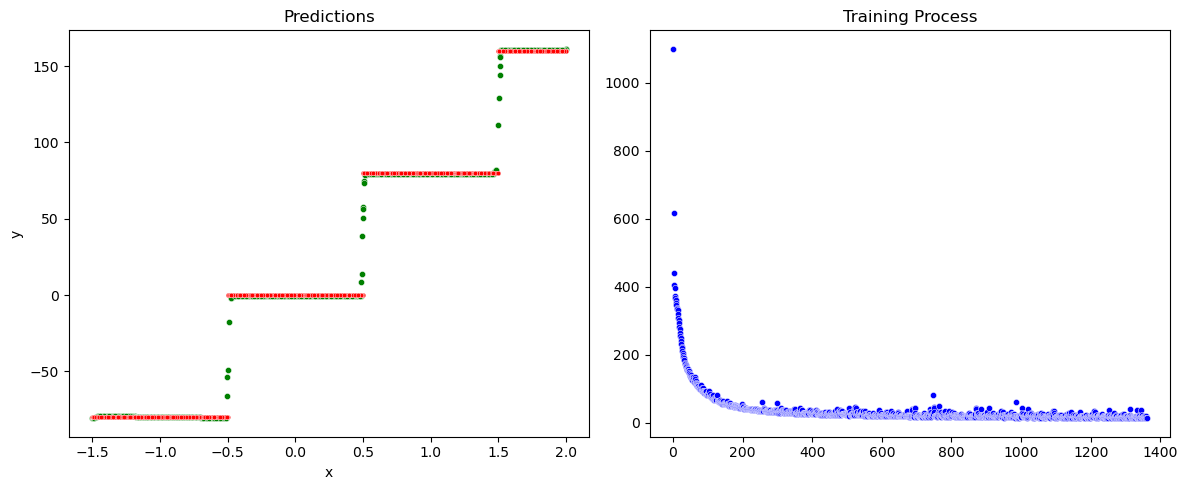

In [116]:
# ReLU dla Steps Large
sl = NN([1, 10, 10, 1], initalization='xavier', activations='relu')
y_norm_sl, parameters_sl = standardize_data(Steps_Large_Train_y)
sl.train(Steps_Large_Train_X, y_norm_sl, Steps_Large_Test_X, Steps_Large_Test_y, denormalize=parameters_sl,
         learning_rate=1, epochs=10000, batch_size=0.1,
         velocity=0.9,
         target=9)

sl.plot_combined(Steps_Large_Test_X, parameters_sl, steps_large_train)

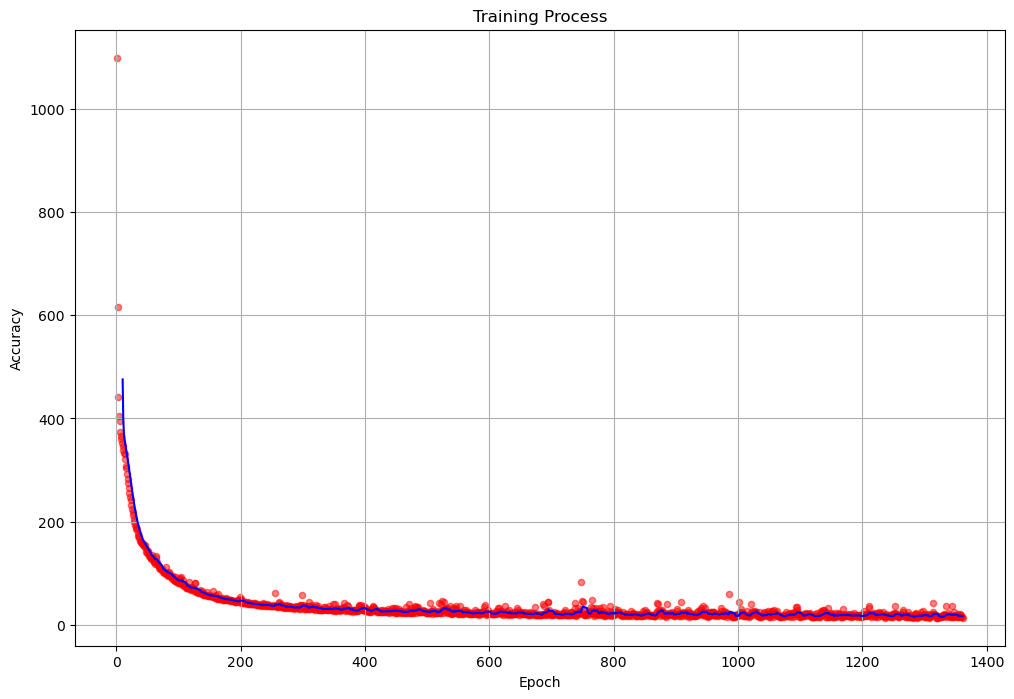

In [117]:
sl.plot_training_process(10)